In [8]:
import pandas as pd

df = pd.read_csv("netflix_titles_2021.csv", on_bad_lines='warn')

<ipython-input-8-aee511c38512>:3: ParserWarning: Skipping line 2658: expected 12 fields, saw 14

  df = pd.read_csv("netflix_titles_2021.csv", on_bad_lines='warn')


In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8806 non-null   object
 3   director      6173 non-null   object
 4   cast          7981 non-null   object
 5   country       7975 non-null   object
 6   date_added    8796 non-null   object
 7   release_year  8806 non-null   object
 8   rating        8802 non-null   object
 9   duration      8803 non-null   object
 10  listed_in     8805 non-null   object
 11  description   8805 non-null   object
dtypes: object(12)
memory usage: 825.8+ KB
None
       show_id   type        title       director                cast  \
count     8807   8807         8806           6173                7981   
unique    8807      4         8806           4528                7692   
top      s5398  Movie  Lal Patthar  Ra

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,1
director,2634
cast,826
country,832
date_added,11
release_year,1
rating,5
duration,4


In [12]:
df[['director','country','cast','date_added','duration']] = df[['director','country','cast','date_added','duration']].fillna('Unknown')

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


EDA Plots

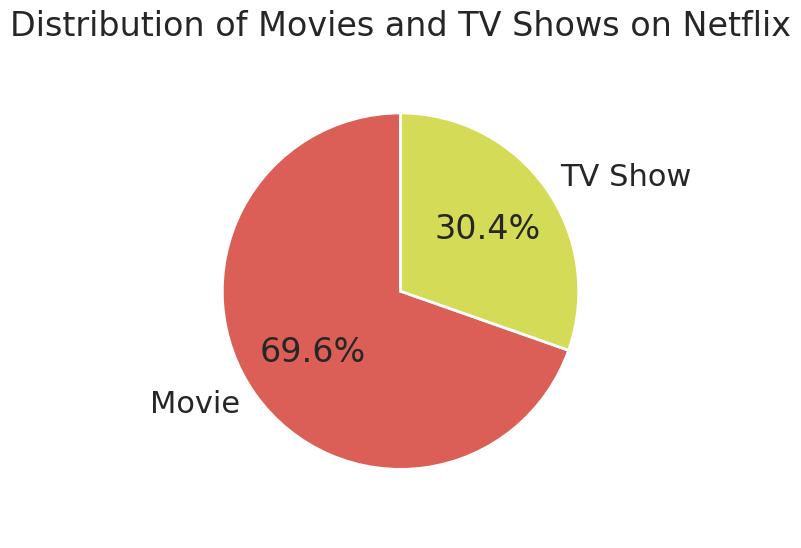

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
types=df[(df['type']=='Movie') | (df['type']=='TV Show')]
type_counts = types['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('hls'))
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.axis('equal')
plt.tight_layout()
plt.show()


<ipython-input-15-c767c4149ce0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


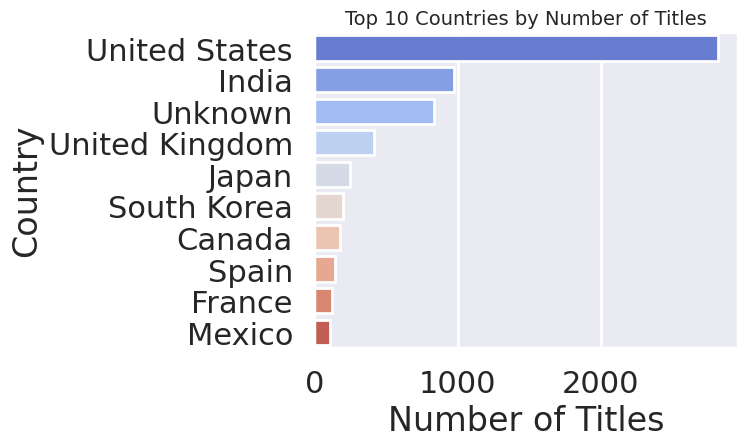

In [15]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Titles', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


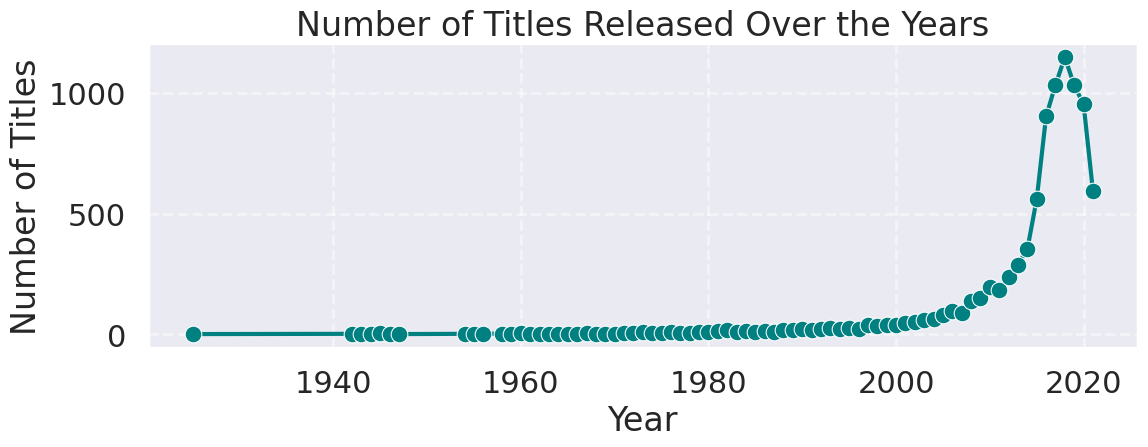

In [16]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
yearly_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='teal')
plt.title('Number of Titles Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True, linestyle='dashed', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-17-c648da353ef1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='mako')


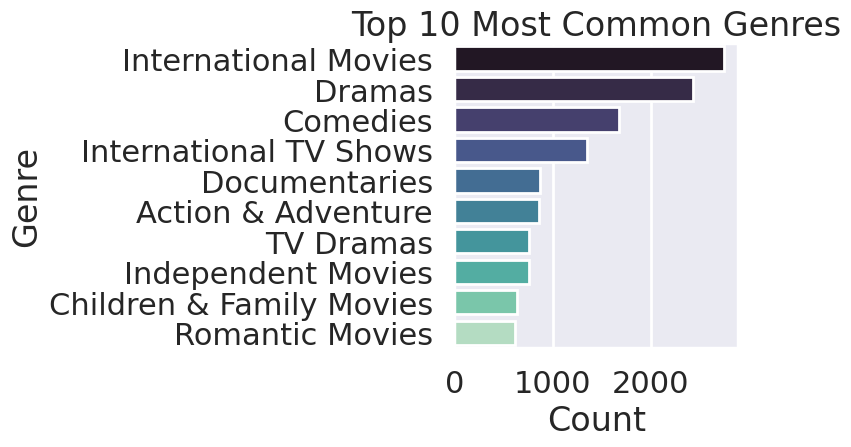

In [17]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
genre_counts = Counter(flat_genres).most_common(10)

genres, counts = zip(*genre_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(genres), palette='mako')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


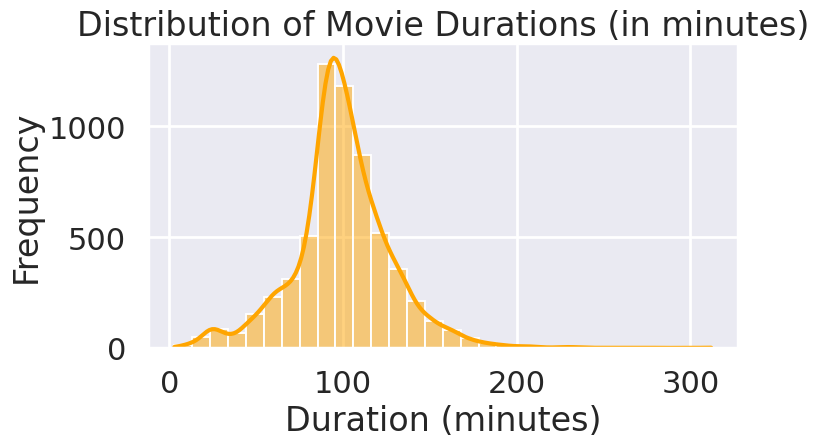

In [18]:
movie_durations = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').dropna()
movie_durations = movie_durations[0].astype(int)

plt.figure(figsize=(8, 5))
sns.histplot(movie_durations, bins=30, kde=True, color = 'orange')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<ipython-input-52-4307a631cbdc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=list(counts), y=list(ratings), palette='rocket')
<ipython-input-52-4307a631cbdc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=list(counts), y=list(ratings), palette='viridis')


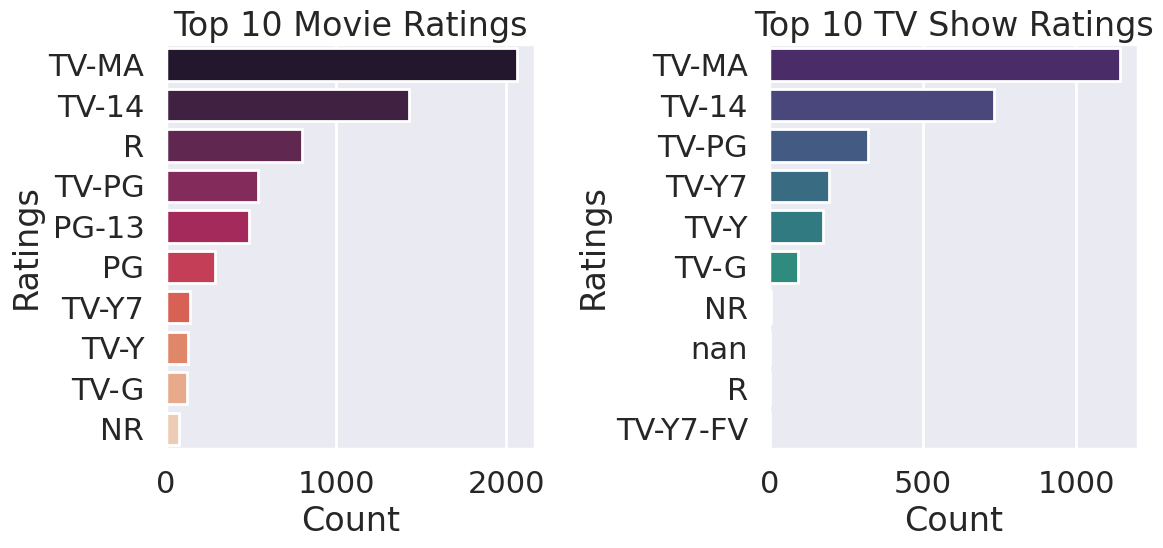

In [52]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
movie_ratings = df[df['type'] == 'Movie']['rating'].astype(str)
rating_count = Counter(movie_ratings).most_common(10)
ratings, counts = zip(*rating_count)
sns.barplot(ax=axes[0], x=list(counts), y=list(ratings), palette='rocket')
axes[0].set_title('Top 10 Movie Ratings')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Ratings')
tv_show_ratings = df[df['type'] == 'TV Show']['rating'].astype(str).dropna()
rating_count = Counter(tv_show_ratings).most_common(10)
ratings, counts = zip(*rating_count)
sns.barplot(ax=axes[1], x=list(counts), y=list(ratings), palette='viridis')
axes[1].set_title('Top 10 TV Show Ratings')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Ratings')

plt.tight_layout()
plt.show()